# Actividad: Análisis exploratorio con técnicas de agrupamiento
## Tania Sayuri Guizado Hernández A01640092
### Problema (100 puntos)

Descarga el conjunto de datos socioeconómicos de los países del mundo, y haz lo siguiente:

#### 1-. Aplica k-medias sobre le conjunto de datos para generar un agrupamiento para los países de la base de datos. Utiliza al menos dos métodos para estimar el número óptimo de grupos.

In [1]:
pip install sklearn-som

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn_som.som import SOM
from sklearn.cluster import KMeans, OPTICS
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import adjusted_rand_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import pairwise_distances
df = pd.read_csv('country_data.csv')

In [3]:
label_encoder = LabelEncoder()
df['country'] = label_encoder.fit_transform(df['country'])

In [4]:
def plot_data(points, labels, title):
    fig = plt.figure()
    if points.shape[1] > 2:
        ax = fig.add_subplot(projection='3d')
        ax.scatter(points[:,0], points[:,1], points[:,2], c=labels, cmap='viridis')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(title)
    else:
        plt.scatter(points[:,0], points[:,1], c=labels, cmap='viridis')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(title)
        plt.show()

In [5]:
x = df.drop('country', axis=1).values
y = df['country'].values

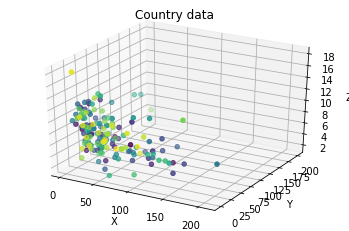

In [6]:
points = x
labels = y
plot_data(points, labels, 'Country data')

----- K-means -----
Labels:  [4 0 0 4 7 7 4 2 2 0 3 8 4 7 0 2 0 4 4 4 0 0 7 6 0 4 4 4 4 2 4 4 4 7 0 0 4
 4 4 0 4 7 3 3 2 0 0 0 0 3 4 7 0 2 2 7 4 4 2 4 3 0 4 4 4 4 4 7 2 4 0 7 0 2
 3 3 0 2 0 7 4 4 6 4 4 7 7 4 4 7 7 9 0 4 4 7 0 4 3 4 7 4 4 0 0 4 4 4 0 4 2
 3 4 4 1 8 4 7 0 0 4 7 3 5 7 7 4 4 8 4 0 7 4 6 7 3 4 0 3 3 0 0 4 0 2 1 4 4
 0 4 4 4 0 7 0 4 0 6 2 2 7 4 4 7 4 4 4]
Centers:  [[2.31945946e+01 4.01513514e+01 6.41756757e+00 4.51081081e+01
  1.07508108e+04 7.87324324e+00 7.20324324e+01 2.32864865e+00
  5.00891892e+03]
 [3.85000000e+00 5.18500000e+01 1.04900000e+01 4.09000000e+01
  5.89000000e+04 3.13350000e+00 8.16000000e+01 1.73500000e+00
  8.12000000e+04]
 [4.31333333e+00 4.43400000e+01 1.08486667e+01 4.09933333e+01
  4.14533333e+04 1.14273333e+00 8.07466667e+01 1.81866667e+00
  4.68000000e+04]
 [1.32538462e+01 5.16692308e+01 8.40846154e+00 5.14692308e+01
  3.02076923e+04 2.95269231e+00 7.83153846e+01 1.92769231e+00
  2.63461538e+04]
 [7.44707692e+01 2.85599846e+01 6.24676923e+00 4.6130

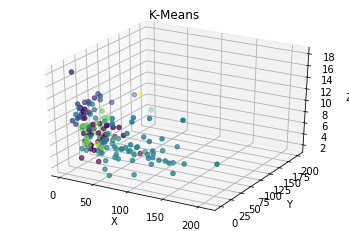

In [7]:
####### K-means #######
print('----- K-means -----')
kmeans = KMeans(n_clusters=10, n_init=10).fit(points)
clustering_labels = kmeans.labels_
centers = kmeans.cluster_centers_
print('Labels: ', clustering_labels)
print('Centers: ', centers)
plot_data(points, clustering_labels, 'K-Means')

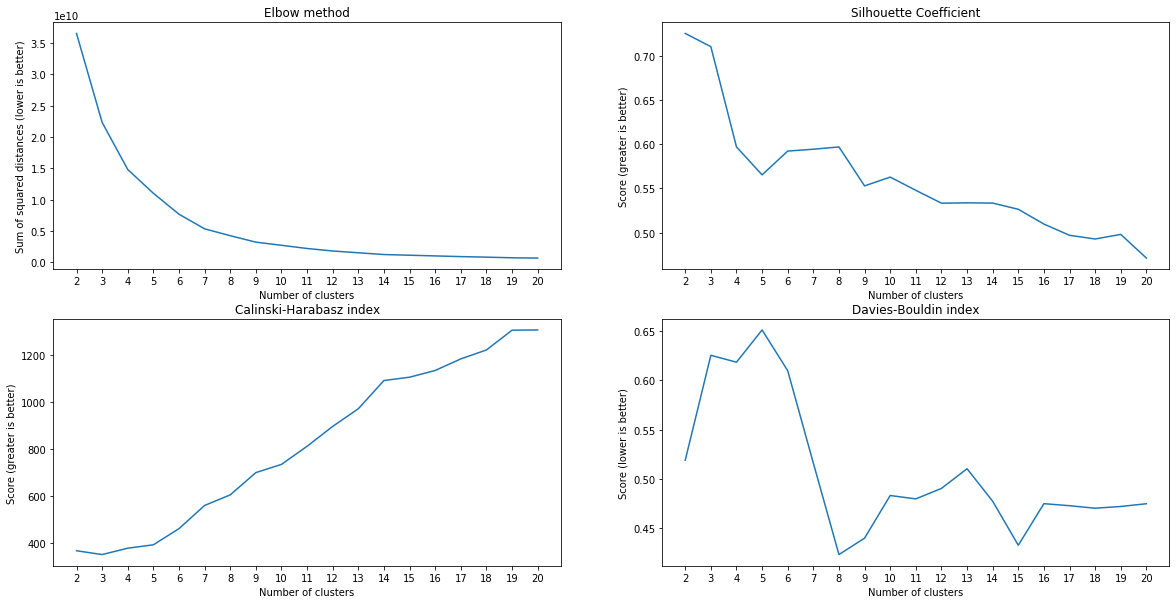

In [8]:
# Optimal number of clusters
sum_of_squared_distances = []
sscore = []
chscore = []
dbscore = []
ks = np.arange(2, 21)
for k in ks:
    # Find clustering model
    kmeans = KMeans(n_clusters=k, n_init=k).fit(points)
    # Evaluate sum of squared distances
    sum_of_squared_distances.append(kmeans.inertia_)
    # Evaluate Silhouette score
    sscore.append(silhouette_score(points, kmeans.labels_))
    # Evaluate Calinski-Harabasz index
    chscore.append(calinski_harabasz_score(points, kmeans.labels_))
    # Evaluate Davies-Bouldin index
    dbscore.append(davies_bouldin_score(points, kmeans.labels_))
fig, axs = plt.subplots(2, 2, figsize=(20, 10))  
axs[0][0].plot(ks, sum_of_squared_distances)
axs[0][0].set_xlabel('Number of clusters')
axs[0][0].set_ylabel('Sum of squared distances (lower is better)')
axs[0][0].set_title('Elbow method')
axs[0][0].set_xticks(ks)
axs[0][1].plot(ks, sscore)
axs[0][1].set_xlabel('Number of clusters')
axs[0][1].set_ylabel('Score (greater is better)')
axs[0][1].set_title('Silhouette Coefficient')
axs[0][1].set_xticks(ks)
axs[1][0].plot(ks, chscore)
axs[1][0].set_xlabel('Number of clusters')
axs[1][0].set_ylabel('Score (greater is better)')
axs[1][0].set_title('Calinski-Harabasz index')
axs[1][0].set_xticks(ks)
axs[1][1].plot(ks, dbscore)
axs[1][1].set_xlabel('Number of clusters')
axs[1][1].set_ylabel('Score (lower is better)')
axs[1][1].set_title('Davies-Bouldin index')
axs[1][1].set_xticks(ks)
plt.show()

#### 2-. Repita lo anterior, pero con otro método de agrupamiento que elijas.

----- OPTICS -----
Labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Centers:  [[2.31945946e+01 4.01513514e+01 6.41756757e+00 4.51081081e+01
  1.07508108e+04 7.87324324e+00 7.20324324e+01 2.32864865e+00
  5.00891892e+03]
 [3.85000000e+00 5.18500000e+01 1.04900000e+01 4.09000000e+01
  5.89000000e+04 3.13350000e+00 8.16000000e+01 1.73500000e+00
  8.12000000e+04]
 [4.31333333e+00 4.43400000e+01 1.08486667e+01 4.09933333e+01
  4.14533333e+04 1.14273333e+00 8.07466667e+01 1.81866667e+00
  4.68000000e+04]
 [1.32538462e+01 5.16692308e+01 8.40846154e+00 5.14692308e+01
  3.02076923e+04 2.95269231e+00 7.83153846e+01 1.92769231e+00
  2.63461538e+04]
 [7.44707692e+01 2.85599846e+01 6.24676923e+00 4.61302

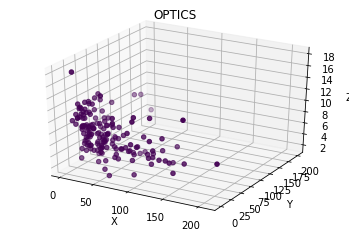

In [9]:
####### OPTICS #######
print('----- OPTICS -----')
optics = OPTICS(min_samples = 20).fit(points)
clustering_labels = optics.labels_
print('Labels: ', clustering_labels)
print('Centers: ', centers)
plot_data(points, clustering_labels, 'OPTICS')

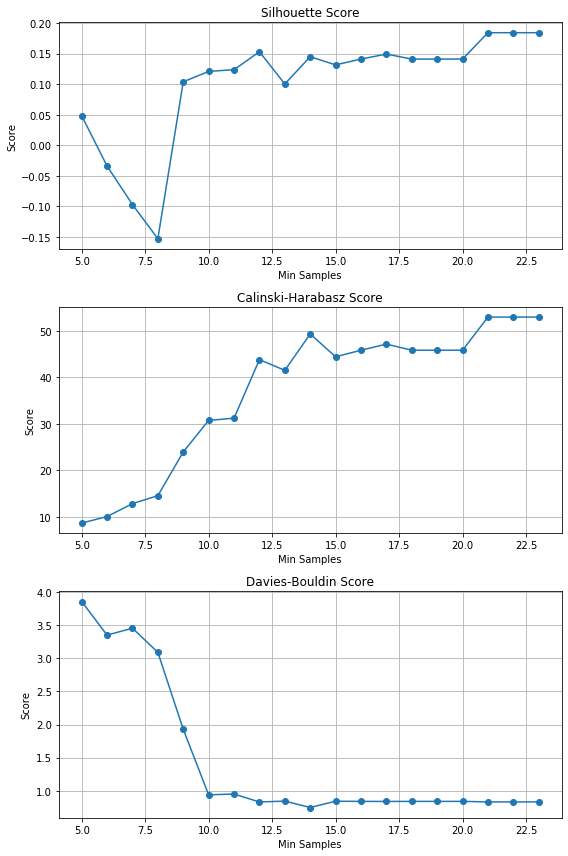

In [10]:
# Optimal number of clusters
def evaluate_optics(points, min_samples_range):
    sscore = []  # Silhouette scores
    chscore = []  # Calinski-Harabasz scores
    dbscore = []  # Davies-Bouldin scores

    for min_samples in min_samples_range:
        optics = OPTICS(min_samples=min_samples).fit(points)
        clustering_labels = optics.labels_
        
        # Check if there are more than one cluster
        if len(np.unique(clustering_labels)) > 1:
            sscore.append(silhouette_score(points, clustering_labels))
            chscore.append(calinski_harabasz_score(points, clustering_labels))
            dbscore.append(davies_bouldin_score(points, clustering_labels))

    return sscore, chscore, dbscore

# Define a range of min_samples values to try
min_samples_range = range(5, 30)

# Evaluate OPTICS for different min_samples values
sscore, chscore, dbscore = evaluate_optics(points, min_samples_range)

# Modify min_samples_range to match the number of evaluated values
min_samples_range = range(5, 5 + len(sscore))

# Plot the evaluation metrics
fig, axs = plt.subplots(3, figsize=(8, 12))

axs[0].plot(min_samples_range, sscore, marker='o')
axs[0].set_title('Silhouette Score')

axs[1].plot(min_samples_range, chscore, marker='o')
axs[1].set_title('Calinski-Harabasz Score')

axs[2].plot(min_samples_range, dbscore, marker='o')
axs[2].set_title('Davies-Bouldin Score')

for ax in axs:
    ax.set_xlabel('Min Samples')
    ax.set_ylabel('Score')
    ax.grid()

plt.tight_layout()
plt.show()

#### 3-. Investiga qué librerías hay en Python para la implementación de mapas autoorganizados, y selecciona alguna para el agrupamiento de los datos de este ejercicio. Algunos ejemplos de librerías son:

- Minosom
- sklearn-som

In [11]:
data_som = SOM(m=167, n=1, dim=9)
data_som.fit(points)
predictions = data_som.predict(points)

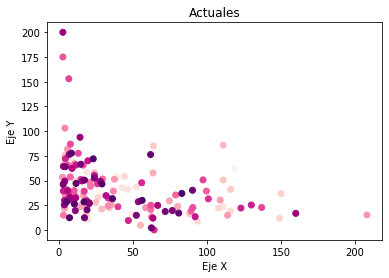

In [12]:
plt.scatter(points[:,0], points[:,1], c=labels, cmap='RdPu')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Actuales')
plt.show()

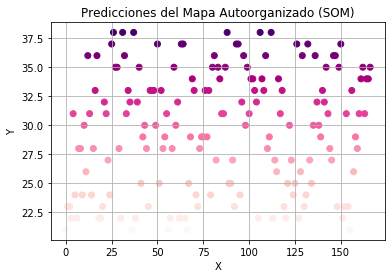

In [13]:
plt.scatter(range(len(predictions)), predictions, c=predictions, cmap='RdPu')
plt.title('Predicciones del Mapa Autoorganizado (SOM)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

#### 4-. De los resultados que se obtienen del agrupamiento, indica si los grupos formados siguen algun patrón que esperabas, o tiene información nueva que no hayas considerado anteriormente.

Los resultados que obtuve en este análisis de agrupamiento sugieren que la elección del número de clusters es crucial para una interpretación efectiva de los datos. De hecho, el reducir el número de clusters en K-means de 10 a 8 parece ser una opción razonable de lo que pude observar en las gráficas de métodos para estimar el número óptimo de grupos y hacer esta reducción podría mejorar la interpretación de los resultados. Además, es importante considerar otros algoritmos de agrupamiento no siempre van a producir resultados satisfactorios, como se vio en el caso de OPTICS que fue mi algoritmo de elección.